In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [27]:
# Load and prepare the dataset
social = pd.read_csv('SocialNetworkAds.csv')

In [28]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [30]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [31]:
social.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [32]:
social.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


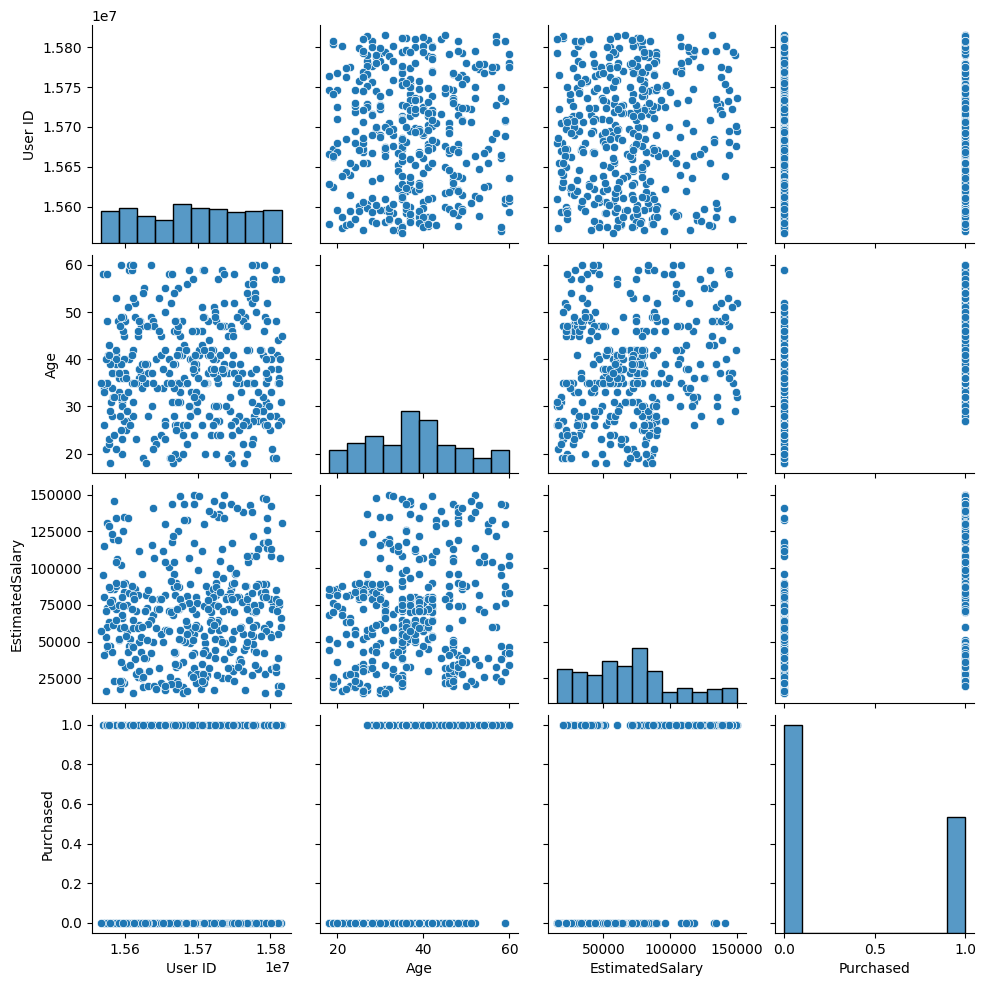

In [33]:
sns.pairplot(social)

In [34]:

social['Gender'] = LabelEncoder().fit_transform(social['Gender'])  # Male = 1, Female = 0


In [35]:
X = social[['Age', 'EstimatedSalary', 'Gender']]
y = social['Purchased']


In [37]:
X

,Age,EstimatedSalary,Gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [39]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)


In [41]:
# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [42]:
# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[50  6]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.87      0.87      0.87        47

    accuracy                           0.88       103
   macro avg       0.88      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103


ROC-AUC Score: 0.8825987841945289


c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [43]:
# Save model and scaler
joblib.dump(model, 'xgb_smote_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [44]:
# Prediction function
def predict_purchase(age, salary, gender):
    g = 1 if gender.lower() == 'male' else 0
    x_input = scaler.transform([[age, salary, g]])
    return model.predict(x_input)[0]

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Save the trained components
joblib.dump(scaler, "scaler.joblib")
joblib.dump(encoder, "encoder.joblib")
joblib.dump(model, "xgb_smote_model.joblib")


['xgb_smote_model.joblib']

In [46]:
print(predict_purchase(19, 19000, 'Male'))     # Expected: 0 or 1
print(predict_purchase(46,	41000,	'Female'))   # Expected: 0 or 1
print(predict_purchase(49, 36000, 'Female'))

0
1
1


c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
